In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [5]:
# Define the paths to your dataset folders
train_path = r"C:\Users\91850\OneDrive\Documents\Downloads\CNN_dataset\Train"
test_path = r"C:\Users\91850\OneDrive\Documents\Downloads\CNN_dataset\Test"
val_path = r"C:\Users\91850\OneDrive\Documents\Downloads\CNN_dataset\Validation"


# Image data generators
train_datagen = ImageDataGenerator(
     rescale=1./255,
)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(256, 256), 
                                                 batch_size=64,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(256, 256),  
                                            batch_size=64,
                                            class_mode='binary',
                                            shuffle=False)

val_set = val_datagen.flow_from_directory(val_path,
                                          target_size=(256, 256),  
                                          batch_size=64,
                                          class_mode='binary')

Found 6828 images belonging to 2 classes.
Found 765 images belonging to 2 classes.
Found 1530 images belonging to 2 classes.


In [7]:
# Model definition
model = Sequential([
    Conv2D(filters=8, kernel_size=[3, 3], strides=[1, 1], padding="same", activation="relu", input_shape=[256, 256, 3]),
    BatchNormalization(),
    MaxPooling2D(pool_size=2, padding='same'),
    Conv2D(filters=8, kernel_size=[5, 5], strides=[1, 1], padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=2, padding='same'),
    Conv2D(filters=16, kernel_size=[5, 5], strides=[1, 1], padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=2, padding='same'),
    Conv2D(filters=16, kernel_size=[5, 5], strides=[1, 1], padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=2, padding='same'),
    Flatten(),
    Dropout(0.5),
    Dense(16,),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.summary()

c:\Users\91850\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\91850\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 8)    │         1,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 16)     │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 16)     │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        65,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,225 (301.66 KB)

 Trainable params: 77,129 (301.29 KB)

 Non-trainable params: 96 (384.00 B)

In [8]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    training_set,
    epochs=10,
    validation_data=val_set,
)

Epoch 1/10


c:\Users\91850\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


107/107 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.6375 - loss: 0.7948 - val_accuracy: 0.6405 - val_loss: 0.6466
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.7347 - loss: 0.5196 - val_accuracy: 0.7059 - val_loss: 0.5653
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.7744 - loss: 0.4465 - val_accuracy: 0.7255 - val_loss: 0.5275
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.7823 - loss: 0.4251 - val_accuracy: 0.7190 - val_loss: 0.5282
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.7993 - loss: 0.4031 - val_accuracy: 0.7418 - val_loss: 0.5183
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.8069 - loss: 0.3764 - val_accuracy: 0.7412 - val_loss: 0.5107
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.8037 - loss: 0.3763 - val_accuracy: 0.7484 - val_loss: 0.5047
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.8225 - loss: 0.3572 - val_accuracy: 0.745

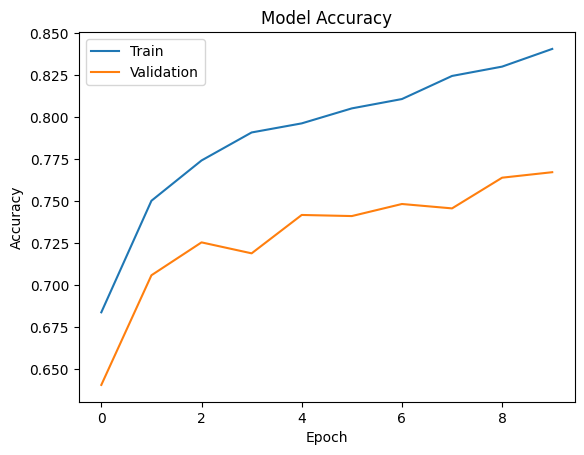

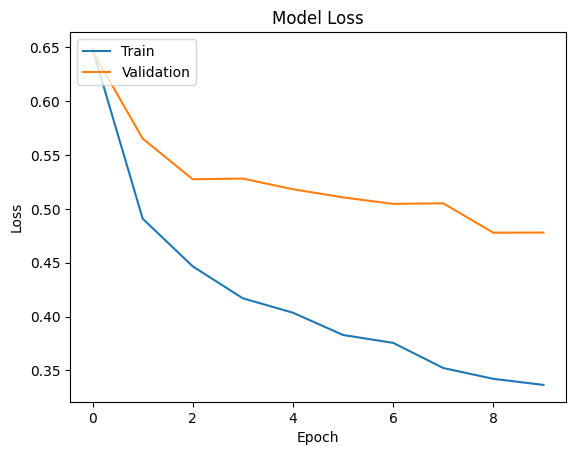

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step


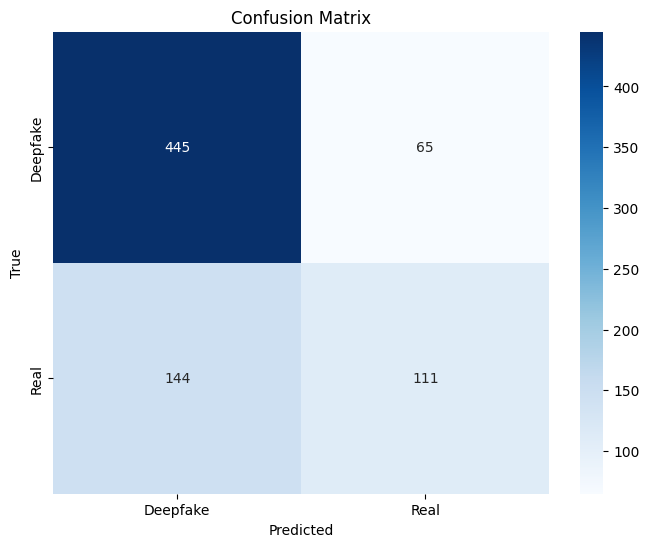

In [10]:
test_pred = model.predict(test_set)
test_pred_classes = np.round(test_pred)

test_true_classes = test_set.classes

cm = confusion_matrix(test_true_classes, test_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_set.class_indices.keys(),
            yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [11]:
evaluation = model.evaluate(test_set)
print("Test Accuracy: {:.2f}%".format(evaluation[1] * 100))

report = classification_report(test_true_classes, test_pred_classes, target_names=["Class 0", "Class 1"], labels=[0, 1], digits=4)
print("Classification Report:\n", report)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 285ms/step - accuracy: 0.8350 - loss: 0.4114
Test Accuracy: 72.68%
Classification Report:
               precision    recall  f1-score   support

     Class 0     0.7555    0.8725    0.8098       510
     Class 1     0.6307    0.4353    0.5151       255

    accuracy                         0.7268       765
   macro avg     0.6931    0.6539    0.6625       765
weighted avg     0.7139    0.7268    0.7116       765



In [14]:
# import tensorflow as tf
# import cv2
# import matplotlib.pyplot as plt

# image_path = r"C:\Users\91850\OneDrive\Documents\CNN_dataset\Test\Deepfake\fake_1.jpg"

# image = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))

# input_arr = tf.keras.preprocessing.image.img_to_array(image)

# input_arr_gray = cv2.cvtColor(input_arr, cv2.COLOR_BGR2GRAY)

# input_arr_gray = input_arr_gray.astype('float32') / 255.
# input_arr_gray = input_arr_gray.reshape(-1, 150, 150, 1)

# predictions1 = model.predict(input_arr_gray)
# print(predictions1)

# plt.imshow(image)

# if predictions1 >= 0.5:
#     print("Real")
# else:
#     print("DeepFake")


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (1, 150, 150, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 150, 150, 1), dtype=float32)
  • training=False
  • mask=None